In [2]:
import pandas as pd
import numpy as np
import ast
import colorsys

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 색상 군집화

In [3]:
df = pd.read_csv("C:/Users/pc/Desktop/민지/동아리/프로젝트(13기)/combined_df.csv")
df.head(5)

,Unnamed: 0,num,꽃,월,계절,꽃말,설명,이미지,선택한 색상,중앙 색상들
0,422,367,수염패랭이꽃,6,여름,의협심,"투쟁심, 정의감, 미적 센스가 풍부한 사람이지만 의사표현이 풍부한 사람입니다. 그 ...",https://www.picturethisai.com/image-handle/web...,"[204, 101, 154]","[[62, 46, 23], [204, 101, 154], [186, 6, 34], ..."
1,423,700,쉬라즈 장미,6,여름,낭만,요즘 겹겹이 꽃잎이 쌓인 화형이 유행처럼 많이 생산하고 있지만 쉬라즈 장미는 나팔처...,https://file.honestflower.kr/media/images/ingr...,"[232, 153, 82]","[[63, 75, 25], [234, 233, 219], [232, 153, 82]..."
2,424,484,에린지움,8,여름,비밀스런 애정,자기 표현에 서투르며 쓸쓸해 하고 고독을 사랑하는 당신. 좀 더 당신의 기분을 개방...,https://blog.kakaocdn.net/dn/Li1Dq/btrec3wNAnF...,"[164, 164, 203]","[[123, 130, 173], [164, 164, 203], [78, 93, 13..."
3,425,364,꽃담배,8,여름,그대있어 외롭지 않네,당신만 있다면 인생은 장미빛이라고 믿는 누군가가 있다면 꼭 붙잡으세요.,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[223, 143, 172]","[[119, 134, 26], [191, 109, 142], [180, 155, 1..."
4,426,702,슈퍼센세이션 장미,6,여름,행복한 사랑,동글동글한 화형으로 드라이가 된 후에도 변형이 적어 드라이 플라워로 많이 쓰이는 스...,https://file.honestflower.kr/media/images/ingr...,"[248, 195, 192]","[[248, 195, 192], [173, 89, 67], [209, 144, 12..."


In [4]:
# 문자열을 리스트로 변환
df['선택한 색상'] = df['선택한 색상'].apply(ast.literal_eval) 

In [5]:
# RGB 값을 (R, G, B) 형식으로 변환
color = np.array(df['선택한 색상'].tolist())
color

array([[204, 101, 154],
       [232, 153,  82],
       [164, 164, 203],
       ...,
       [219, 213, 200],
       [231, 222, 205],
       [226, 199, 134]])

문자열이면 엘보우 그래프에서 오류가 나타나기 때문에 리스트로 전환시킴 (원소는 숫자로 변환) </br>
- ast.literal_eval: 리터럴 문자열을 실제 파이썬 리터럴 값 (리스트, 튜플, 딕셔너리 등) 으로 변환

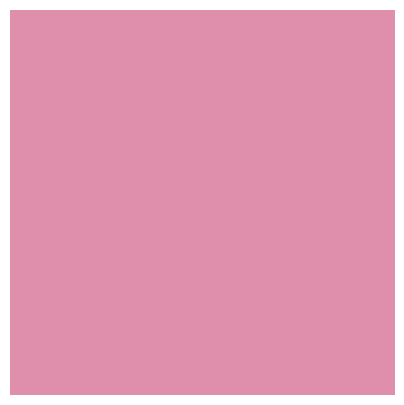

In [104]:
#데이터 하나의 색상 확인

# 이미지 크기
width, height = 5, 5

# 이미지 생성
image = np.ones((height, width, 3), dtype=np.uint8)
image[:, :] = df['선택한 색상'][3]

# 이미지 시각화
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

### 1. KMean++ 알고리즘

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

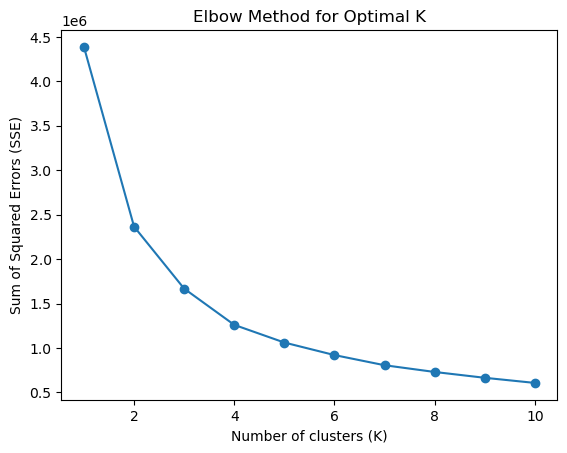

In [6]:
#엘보우그래프
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(color)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

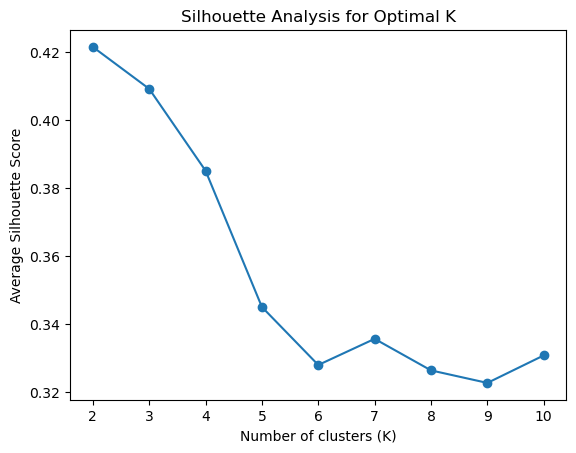

In [84]:
#실루엣 분석
from sklearn.metrics import silhouette_score

silhouette_avg = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(color)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(color, cluster_labels))


plt.plot(k_range, silhouette_avg, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

클러스터 개수가 2,3개일 때가 적졀

In [8]:
# KMeans++ 알고리즘을 사용하여 군집화
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(color)

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [9]:
# 각 색상의 클러스터 레이블 추출
labels = kmeans.labels_

# 결과를 데이터프레임에 추가
df['cluster'] = labels

In [10]:
df.head(5)

,Unnamed: 0,num,꽃,월,계절,꽃말,설명,이미지,선택한 색상,중앙 색상들,cluster
0,422,367,수염패랭이꽃,6,여름,의협심,"투쟁심, 정의감, 미적 센스가 풍부한 사람이지만 의사표현이 풍부한 사람입니다. 그 ...",https://www.picturethisai.com/image-handle/web...,"[204, 101, 154]","[[62, 46, 23], [204, 101, 154], [186, 6, 34], ...",5
1,423,700,쉬라즈 장미,6,여름,낭만,요즘 겹겹이 꽃잎이 쌓인 화형이 유행처럼 많이 생산하고 있지만 쉬라즈 장미는 나팔처...,https://file.honestflower.kr/media/images/ingr...,"[232, 153, 82]","[[63, 75, 25], [234, 233, 219], [232, 153, 82]...",2
2,424,484,에린지움,8,여름,비밀스런 애정,자기 표현에 서투르며 쓸쓸해 하고 고독을 사랑하는 당신. 좀 더 당신의 기분을 개방...,https://blog.kakaocdn.net/dn/Li1Dq/btrec3wNAnF...,"[164, 164, 203]","[[123, 130, 173], [164, 164, 203], [78, 93, 13...",5
3,425,364,꽃담배,8,여름,그대있어 외롭지 않네,당신만 있다면 인생은 장미빛이라고 믿는 누군가가 있다면 꼭 붙잡으세요.,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[223, 143, 172]","[[119, 134, 26], [191, 109, 142], [180, 155, 1...",3
4,426,702,슈퍼센세이션 장미,6,여름,행복한 사랑,동글동글한 화형으로 드라이가 된 후에도 변형이 적어 드라이 플라워로 많이 쓰이는 스...,https://file.honestflower.kr/media/images/ingr...,"[248, 195, 192]","[[248, 195, 192], [173, 89, 67], [209, 144, 12...",1


In [11]:
#중심지정
cluster_centers = kmeans.cluster_centers_ 

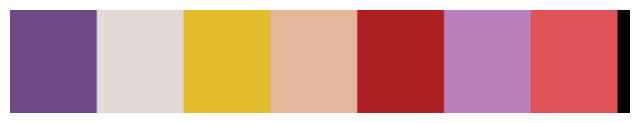

In [12]:
# 결과 시각화
def plot_colors(cluster_centers, labels, n_colors):
    bar = np.zeros((50, 300, 3), dtype='float')
    step = 300 // n_colors

    for i in range(n_colors):
        start = i * step
        end = start + step
        bar[:, start:end, :] = cluster_centers[i] / 255

    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.imshow(bar)
    plt.show()

# 클러스터 중심 색상을 시각화
plot_colors(cluster_centers, labels, n_clusters)

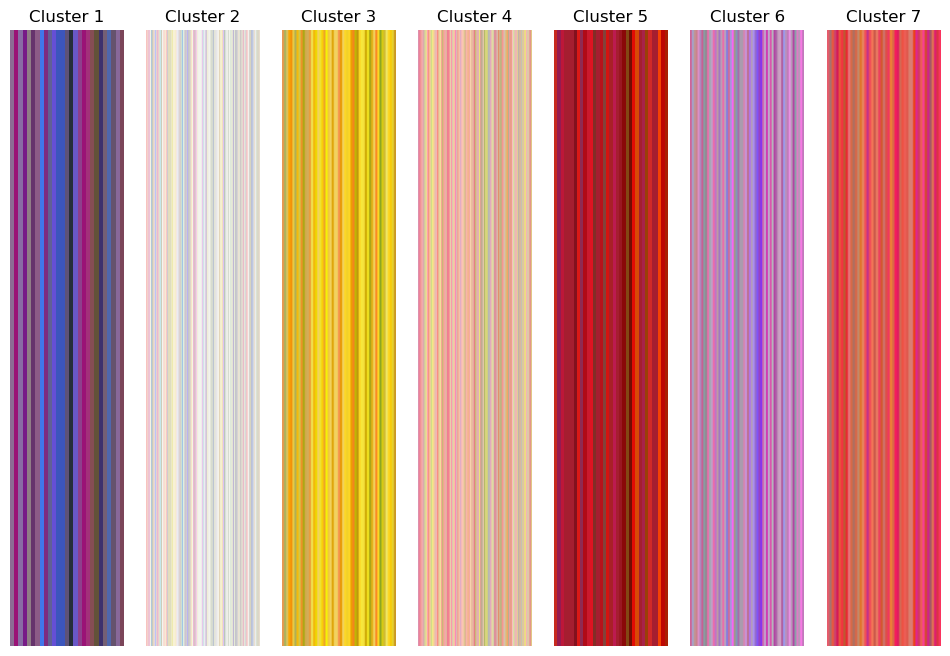

In [13]:
# 각 군집의 색상을 시각화하는 함수
def plot_clusters(data, labels, n_clusters):
    plt.figure(figsize=(12, 8))
    
    for i in range(n_clusters):
        cluster = data[labels == i]
        plt.subplot(1, n_clusters, i + 1)
        plt.imshow([cluster], aspect='auto')
        plt.axis('off')
        plt.title(f'Cluster {i + 1}')
    plt.show()

# 각 군집의 색상을 시각화
plot_clusters(color, labels, n_clusters)

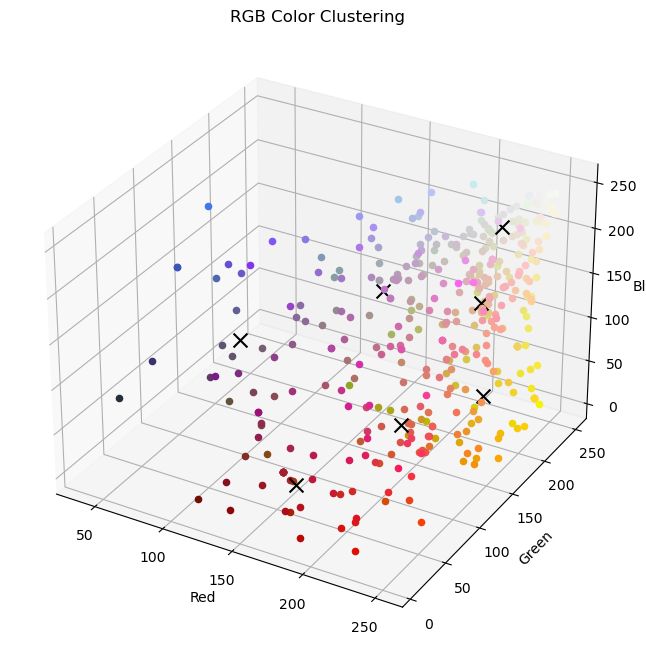

In [14]:
# 3차원 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = color / 255.0  # 정규화하여 색상 값으로 사용

for i in range(len(color)):
    ax.scatter(color[i, 0], color[i, 1], color[i, 2], c=[colors[i]], marker='o')

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# 클러스터 중심을 표시
for center in cluster_centers:
    ax.scatter(center[0], center[1], center[2], c='black', marker='x', s=100)

plt.title('RGB Color Clustering')
plt.show()

### 2. HSV를 이용 / 자체 군집화

HSV (Hue, Saturation, Value) / HSB (Hue, Saturation, Brightness) </br>
HSV/HSB 모델은 색상(Hue), 채도(Saturation), 밝기(Value 또는 Brightness)로 색상을 표현합니다. </br>
HSV/HSB 모델은 사람의 색상 인지 방식과 유사하여 색상 조정 및 처리에 유용합니다.

https://www-dbpia-co-kr.sproxy.dongguk.edu/journal/articleDetail?nodeId=NODE06610397 </br>
https://www-dbpia-co-kr.sproxy.dongguk.edu/pdf/pdfView.do?nodeId=NODE06610397
- 해당 논문 참고하여 HSV 진행

In [15]:
#RGB 배열을 HSV로 변환하는 함수
def rgb_to_hsv_array(rgb_array):
    hsv_array = np.empty_like(rgb_array, dtype=np.float64)

    for i in range(len(rgb_array)):
        r, g, b = rgb_array[i]
        h, s, v = colorsys.rgb_to_hsv(r, g, b) #0~1 / 0~1 / 0~255
        h *= 360  # hue 값을 0~360도로 변환
        s *= 100
        v /= 255
        v *= 100
        hsv_array[i] = [h, s, v]

    return hsv_array

In [16]:
# RGB 값을 HSV로 변환
hsv_color = rgb_to_hsv_array(color)

# 변환된 HSV 데이터 출력
print("Converted HSV data:")
print(hsv_color)

Converted HSV data:
[[329.12621359  50.49019608  80.        ]
 [ 28.4         64.65517241  90.98039216]
 [240.          19.21182266  79.60784314]
 ...
 [ 41.05263158   8.67579909  85.88235294]
 [ 39.23076923  11.25541126  90.58823529]
 [ 42.39130435  40.7079646   88.62745098]]


In [17]:
hsv_color2 = pd.DataFrame(hsv_color)
hsv_color2.columns=['H','S','V']

# 각 행에 대해 HSV 값을 묶어서 리스트로 변환하는 함수
def combine_hsv(row):
    return [row['H'], row['S'], row['V']]


df['HSV'] = hsv_color2.apply(combine_hsv, axis=1)
df.head(5)

,Unnamed: 0,num,꽃,월,계절,꽃말,설명,이미지,선택한 색상,중앙 색상들,cluster,HSV
0,422,367,수염패랭이꽃,6,여름,의협심,"투쟁심, 정의감, 미적 센스가 풍부한 사람이지만 의사표현이 풍부한 사람입니다. 그 ...",https://www.picturethisai.com/image-handle/web...,"[204, 101, 154]","[[62, 46, 23], [204, 101, 154], [186, 6, 34], ...",5,"[329.126213592233, 50.49019607843137, 80.0]"
1,423,700,쉬라즈 장미,6,여름,낭만,요즘 겹겹이 꽃잎이 쌓인 화형이 유행처럼 많이 생산하고 있지만 쉬라즈 장미는 나팔처...,https://file.honestflower.kr/media/images/ingr...,"[232, 153, 82]","[[63, 75, 25], [234, 233, 219], [232, 153, 82]...",2,"[28.400000000000002, 64.65517241379311, 90.980..."
2,424,484,에린지움,8,여름,비밀스런 애정,자기 표현에 서투르며 쓸쓸해 하고 고독을 사랑하는 당신. 좀 더 당신의 기분을 개방...,https://blog.kakaocdn.net/dn/Li1Dq/btrec3wNAnF...,"[164, 164, 203]","[[123, 130, 173], [164, 164, 203], [78, 93, 13...",5,"[240.0, 19.21182266009852, 79.6078431372549]"
3,425,364,꽃담배,8,여름,그대있어 외롭지 않네,당신만 있다면 인생은 장미빛이라고 믿는 누군가가 있다면 꼭 붙잡으세요.,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[223, 143, 172]","[[119, 134, 26], [191, 109, 142], [180, 155, 1...",3,"[338.25, 35.874439461883405, 87.45098039215686]"
4,426,702,슈퍼센세이션 장미,6,여름,행복한 사랑,동글동글한 화형으로 드라이가 된 후에도 변형이 적어 드라이 플라워로 많이 쓰이는 스...,https://file.honestflower.kr/media/images/ingr...,"[248, 195, 192]","[[248, 195, 192], [173, 89, 67], [209, 144, 12...",1,"[3.214285714285716, 22.58064516129032, 97.2549..."


https://ko.rakko.tools/tools/30/ </br>
해당 색상표를 살펴보면서 색상 기준 설립
- 빨 / 주 / 노 / 초 / 파+남 / 보 / 핑크

In [18]:
# 색상 카테고리 할당
def assign_cluster(hsv_list):
    if (hsv_list[2] > 90) & (hsv_list[1] < 5):
        return '흰색'

    elif 0 <= hsv_list[0] < 15 or hsv_list[0] >= 340:
        return '빨강'
    elif 15 <= hsv_list[0] < 50:
        return '주황'
    elif 50 <= hsv_list[0] < 60:
        return '노랑'
    elif 60 <= hsv_list[0] < 170:
        return '초록'
    elif 170 <= hsv_list[0] < 255:
        return '파랑'
    elif 255 <= hsv_list[0] < 300:
        return '보라'
    elif 300 <= hsv_list[0] < 340:
        return '분홍'
    else:
        return 'Unknown'

# apply 함수를 사용하여 클러스터 칼럼에 할당
df['Cluster'] = df['HSV'].apply(assign_cluster)
df.head(5)

,Unnamed: 0,num,꽃,월,계절,꽃말,설명,이미지,선택한 색상,중앙 색상들,cluster,HSV,Cluster
0,422,367,수염패랭이꽃,6,여름,의협심,"투쟁심, 정의감, 미적 센스가 풍부한 사람이지만 의사표현이 풍부한 사람입니다. 그 ...",https://www.picturethisai.com/image-handle/web...,"[204, 101, 154]","[[62, 46, 23], [204, 101, 154], [186, 6, 34], ...",5,"[329.126213592233, 50.49019607843137, 80.0]",분홍
1,423,700,쉬라즈 장미,6,여름,낭만,요즘 겹겹이 꽃잎이 쌓인 화형이 유행처럼 많이 생산하고 있지만 쉬라즈 장미는 나팔처...,https://file.honestflower.kr/media/images/ingr...,"[232, 153, 82]","[[63, 75, 25], [234, 233, 219], [232, 153, 82]...",2,"[28.400000000000002, 64.65517241379311, 90.980...",주황
2,424,484,에린지움,8,여름,비밀스런 애정,자기 표현에 서투르며 쓸쓸해 하고 고독을 사랑하는 당신. 좀 더 당신의 기분을 개방...,https://blog.kakaocdn.net/dn/Li1Dq/btrec3wNAnF...,"[164, 164, 203]","[[123, 130, 173], [164, 164, 203], [78, 93, 13...",5,"[240.0, 19.21182266009852, 79.6078431372549]",파랑
3,425,364,꽃담배,8,여름,그대있어 외롭지 않네,당신만 있다면 인생은 장미빛이라고 믿는 누군가가 있다면 꼭 붙잡으세요.,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[223, 143, 172]","[[119, 134, 26], [191, 109, 142], [180, 155, 1...",3,"[338.25, 35.874439461883405, 87.45098039215686]",분홍
4,426,702,슈퍼센세이션 장미,6,여름,행복한 사랑,동글동글한 화형으로 드라이가 된 후에도 변형이 적어 드라이 플라워로 많이 쓰이는 스...,https://file.honestflower.kr/media/images/ingr...,"[248, 195, 192]","[[248, 195, 192], [173, 89, 67], [209, 144, 12...",1,"[3.214285714285716, 22.58064516129032, 97.2549...",빨강


In [19]:
# 군집 개수
n_clusters = df['Cluster'].nunique() #8개
# 군집 레이블
labels = df['Cluster'].unique()

클러스터 평균 색상 보여주기

In [23]:
for cluster, group in df.groupby('Cluster'):
    print(group['선택한 색상'])

13     [248, 245, 229]
21     [205, 204, 185]
38     [240, 234, 135]
53      [176, 175, 86]
54     [205, 204, 185]
63     [244, 233, 158]
80      [211, 200, 73]
93      [172, 168, 20]
103    [234, 226, 184]
106    [236, 233, 197]
109    [239, 235, 175]
124    [247, 240, 200]
132     [240, 228, 83]
139    [238, 227, 123]
143      [238, 215, 1]
145     [237, 228, 50]
159      [245, 243, 6]
182    [217, 213, 131]
204     [241, 209, 43]
225    [230, 221, 160]
227    [214, 209, 168]
239      [191, 182, 5]
246    [242, 240, 214]
251     [247, 233, 60]
265     [245, 225, 60]
284     [244, 231, 33]
305     [165, 164, 23]
334    [240, 238, 215]
341    [215, 206, 152]
353    [231, 230, 212]
359     [216, 203, 18]
370     [209, 187, 52]
372    [237, 235, 110]
377    [216, 213, 192]
380    [240, 231, 100]
399     [230, 209, 48]
Name: 선택한 색상, dtype: object
24     [172, 138, 190]
29     [140, 108, 148]
44     [137, 108, 164]
65      [119, 27, 135]
92      [102, 51, 108]
94     [205, 203, 207]
154   

In [26]:
np.mean([[204, 101, 154],[232, 153, 82]])

154.33333333333334

In [24]:
# 클러스터별 대표 색상 계산 함수
def get_representative_color(color_list):
    # 색상의 평균값을 사용하여 대표 색상 선택
    color_array = np.array(color_list)
    mean_color = np.mean(color_array, axis=0).astype(int)
    return mean_color

cluster_colors = {}
for cluster, group in df.groupby('Cluster'):
    colors = []
    colors.append(group)
    representative_color = get_representative_color(colors)
    cluster_colors[cluster] = representative_color

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# 클러스터별 대표 색상 계산 함수
def get_representative_color(color_list):
    # 색상의 평균값을 사용하여 대표 색상 선택
    color_array = np.array(color_list)
    mean_color = np.mean(color_array, axis=0).astype(int)
    return mean_color

# 클러스터별 대표 색상 계산
cluster_colors = {}
for cluster, group in df.groupby('Cluster'):
    colors = []
    for color_set in group['중앙 색상들']:
        colors.extend(color_set)
    representative_color = get_representative_color(colors)
    cluster_colors[cluster] = representative_color

# 시각화
fig, ax = plt.subplots()

clusters = list(cluster_colors.keys())
colors = [cluster_colors[cluster] for cluster in clusters]

# 바 그래프 그리기
ax.bar(clusters, [1] * len(clusters), color=np.array(colors)/255.0)

# 클러스터별 대표 색상 출력
for cluster, color in cluster_colors.items():
    print(f'Cluster {cluster}: 대표 색상 {color}')

plt.xlabel('Cluster')
plt.ylabel('대표 색상')
plt.title('클러스터별 대표 색상 시각화')
plt.show()

In [ ]:
# 결과 시각화
def plot_colors(cluster_centers, labels, n_colors):
    bar = np.zeros((50, 300, 3), dtype='float')
    step = 300 // n_colors

    for i in range(n_colors):
        start = i * step
        end = start + step
        bar[:, start:end, :] = cluster_centers[i] / 255

    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.imshow(bar)
    plt.show()

# 클러스터 중심 색상을 시각화
plot_colors(cluster_centers, labels, n_clusters)

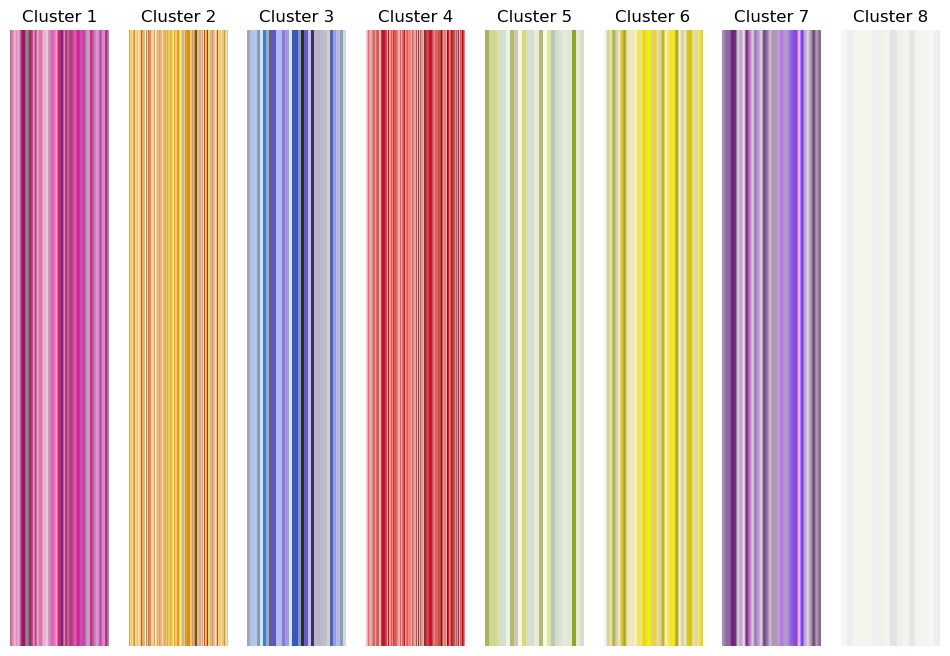

In [237]:
# 각 군집의 색상을 시각화하는 함수
def plot_clusters(data, labels, n_clusters):
    plt.figure(figsize=(12, 8))
    
    for i in range(n_clusters):
        cluster = data['선택한 색상'][data['Cluster']==labels[i]]
        cluster = np.array(cluster.tolist())
        plt.subplot(1, n_clusters, i + 1)
        plt.imshow([cluster], aspect='auto')
        plt.axis('off')
        plt.title(f'Cluster {i + 1}')
    plt.show()

# 각 군집의 색상을 시각화
plot_clusters(df, labels, n_clusters)